In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

**2.1**	Import the data file into a dataframe named "meds".

[1 Mark]

In [2]:
meds = pd.read_csv('G:/CSIS 3764/CSIS 3764/2022 tests/medicine.csv')

In [9]:
#determine average of AGe with Blood Pressure
#col1(Age)  col2(Blood pressure)


TypeError: Cannot perform 'rand_' with a dtyped [bool] array and scalar of type [bool]

**2.2**	Inspect the data by:
* Displaying the first 20 records of the dataset.
* Generating a statistical summary of all the features.
* Getting a concise summary of the dataframe such as the index, data type, columns, non-null values and memory usage.
* Checking for any missing values.

[4 Marks]

In [3]:
meds.head(20)

,Age,Gender,Blood_Presure,Cholesterol,Ratio_Na_K,Medication
0,23,Female,High,High,25.355,meds5
1,47,Male,Low,High,13.093,meds3
2,47,Male,Low,High,10.114,meds3
3,28,Female,Normal,High,7.798,meds4
4,61,Female,Low,High,18.043,meds5
5,22,Female,Normal,High,8.607,meds4
6,49,Female,Normal,High,16.275,meds5
7,41,Male,Low,High,11.037,meds3
8,60,Male,Normal,High,15.171,meds5
9,43,Male,Low,Normal,19.368,meds5


In [4]:
meds.describe(include="all")
#meds[['Age', 'Gender']].describe() This is the description for only two  columns not just all

,Age,Gender,Blood_Presure,Cholesterol,Ratio_Na_K,Medication
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,Male,High,High,NaN,meds5
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [5]:
meds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            200 non-null    int64  
 1   Gender         200 non-null    object 
 2   Blood_Presure  200 non-null    object 
 3   Cholesterol    200 non-null    object 
 4   Ratio_Na_K     200 non-null    float64
 5   Medication     200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
meds.isnull().sum()

Age              0
Gender           0
Blood_Presure    0
Cholesterol      0
Ratio_Na_K       0
Medication       0
dtype: int64

**2.3**	Visualise the data:
* Use the seaborn library to create a combined scatter plot between Age and Ratio_Na_K (the ratio of sodium and potassium in the patients’ blood) for each of the different medications (labels).

[3 Marks]

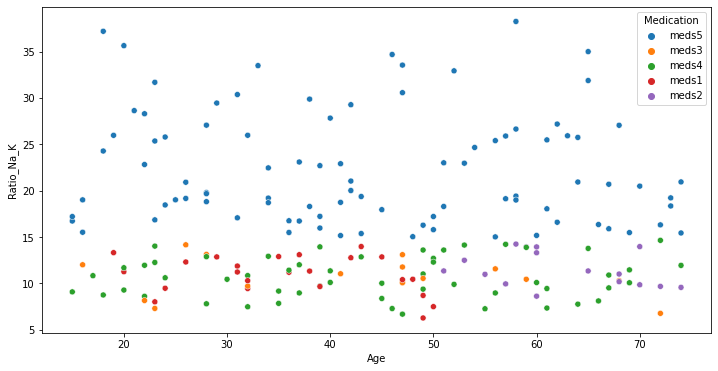

In [7]:
import seaborn as sns 
#hue always =y,predicted, main grouped by 
sns.scatterplot(data = meds, x = 'Age', y = 'Ratio_Na_K', hue = 'Medication')
fig = plt.gcf()
fig.set_size_inches(12, 6)

**2.4**	What information can be deduced from the scatter plot about the efficacy of the different medications with regard to the patients’ age and the sodium-potassium ratio in their blood? (Print your answer in the Jupyter notebook)

[4 Marks]

* Meds 5 was only effective with patients whos Na:K ratio was above 15.
* The rest of the Meds were effective with patients whos Na:K ratio was below 15.
* Meds 1 was only effective with patients younger than 50.
* Meds 2 was only effective with patients older than 50.

**2.5**	Determine and display the number of records relevant to each medication.

[1 Mark]

In [8]:
#meds['Medication'].value_counts()
medscount = meds.groupby("Medication").size()
medscount

Medication
meds1    23
meds2    16
meds3    16
meds4    54
meds5    91
dtype: int64

**2.6**	Determine whether the data is balanced with regard to the number of records for each medication by:
* Creating a pie chart that shows the percentage of records for each medication.
* Percentages displayed on the pie chart should be rounded to 2 decimals.

[4 Marks]

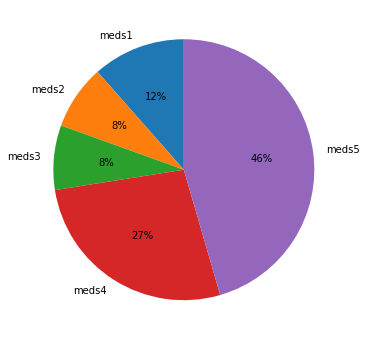

In [9]:

#medscount = meds.groupby("Medication").size()
#meds_labels = meds['Medication'].value_counts().index

plt.pie(medscount, labels = ['meds1','meds2', 'meds3', 'meds4', 'meds5'], autopct = '%.0f%%', startangle=90)
fig = plt.gcf()
fig.set_size_inches(6, 6)

**2.7**	Perform the necessary operations to balance the data:
* Use oversampling to balance the number of records with regard to medication.
* Assign the resampled data to the dataframe named “meds_resampled”.
* Use the dataframe meds_resampled for the remainder of Question 2.

[6 Marks]

In [13]:
!pip install imbalanced-learn

In [10]:
#githu/dataprofessor/imbalanced-data
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

#Our prediction value/y
X = meds.drop('Medication', axis = 1) #evry column excluding med col
y = meds['Medication'] #extracted only medication col

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y) #concat PP1
meds_resampled = pd.concat([X_resampled, y_resampled], axis=1) #axis 1- cols
meds_resampled.head(20)

,Age,Gender,Blood_Presure,Cholesterol,Ratio_Na_K,Medication
0,23,Female,High,High,25.355,meds5
1,47,Male,Low,High,13.093,meds3
2,47,Male,Low,High,10.114,meds3
3,28,Female,Normal,High,7.798,meds4
4,61,Female,Low,High,18.043,meds5
5,22,Female,Normal,High,8.607,meds4
6,49,Female,Normal,High,16.275,meds5
7,41,Male,Low,High,11.037,meds3
8,60,Male,Normal,High,15.171,meds5
9,43,Male,Low,Normal,19.368,meds5


**2.8**	Confirm the successful resampling of the data by:
* Displaying the number of records for each medication.
* Recreating the pie chart that shows the percentage of records for each medication.
* Percentages displayed on the pie chart should be rounded to 2 decimals.

[3 Marks]

In [11]:
meds_resampled['Medication'].value_counts()

meds5    91
meds3    91
meds4    91
meds1    91
meds2    91
Name: Medication, dtype: int64

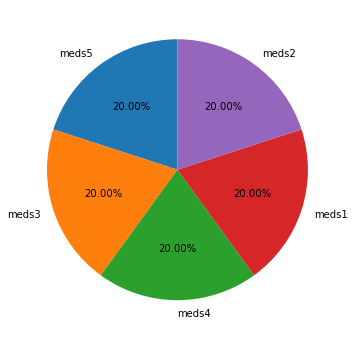

In [12]:
meds_resampled_count = meds_resampled['Medication'].value_counts().to_list()
meds_resampled_labels = meds_resampled['Medication'].value_counts().index

plt.pie(meds_resampled_count, labels = meds_resampled_labels, autopct = '%.2f%%', startangle=90)
fig = plt.gcf()
fig.set_size_inches(6, 6)

**2.9**	Convert the text values in the dataframe to numeric values:
* Convert the columns that contain only two unique text values to binary values [0, 1].
* Convert the columns that contain more than two unique text values to numeric values [0, 1, 2, …], with the highest numeric value depending on the number of unique text values.

[6 Marks]

In [13]:
print(f"Gender: {meds_resampled['Gender'].unique()}\n")
print(f"Cholesterol: {meds_resampled['Cholesterol'].unique()}\n")
print(f"Blood_Presure: {meds_resampled['Blood_Presure'].unique()}\n")
print(f"Medication: {meds_resampled['Medication'].unique()}\n")

Gender: ['Female' 'Male']

Cholesterol: ['High' 'Normal']

Blood_Presure: ['High' 'Low' 'Normal']

Medication: ['meds5' 'meds3' 'meds4' 'meds1' 'meds2']



In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
meds_resampled['Gender'] = label_encoder.fit_transform(meds_resampled['Gender'])
meds_resampled['Blood_Presure'] = label_encoder.fit_transform(meds_resampled['Blood_Presure'])
meds_resampled['Cholesterol'] = label_encoder.fit_transform(meds_resampled['Cholesterol'])
meds_resampled['Medication'] = label_encoder.fit_transform(meds_resampled['Medication'])

meds_resampled

,Age,Gender,Blood_Presure,Cholesterol,Ratio_Na_K,Medication
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
5,22,0,2,0,8.607,3
6,49,0,2,0,16.275,4
7,41,1,1,0,11.037,2
8,60,1,2,0,15.171,4
9,43,1,1,1,19.368,4


# **2.10**	Confirm that there are no more columns of type object.

[2 Marks]

In [16]:
#PP1
print(f"Number of columns with data type 'object': {len(meds_resampled.dtypes[meds_resampled.dtypes == 'object'])}")

Number of columns with data type 'object': 0


**2.11**	Determine the correlation between Medication and the other data columns.
* Create a heatmap that depicts the correlation.

[4 Marks]

In [17]:
corr = meds_resampled.corr()
corr[['Medication']]

,Medication
Age,-0.010612
Gender,-0.110059
Blood_Presure,0.620695
Cholesterol,-0.006277
Ratio_Na_K,0.559481
Medication,1.000000


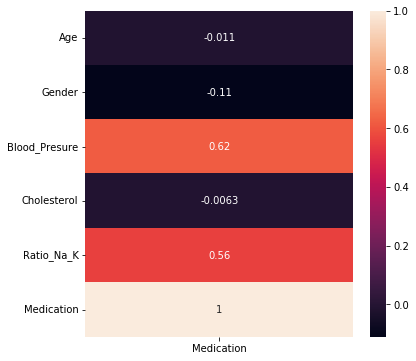

In [18]:
sns.heatmap(corr[['Medication']], annot = True)
fig = plt.gcf()
fig.set_size_inches(6, 6)

**2.12**	What can be deduced from the correlation values with regard to their influence on the medication that will be prescribed? (Print your answer in the Jupyter notebook)

[2 Marks]

* The medication that needs to be subscribed is mostly influenced by the patient's blood presure, followed by the Na:K ratio in the patient's blood.

**2.13**	Define X and y and create a training / testing dataset of 80% / 20%:
* X = Data features.
* y = Medication.
* Determine the dimensions of X, y X_train and X_test.
* Ensure that all pre-processing is complete.

[8 Marks]

In [19]:
#
PP1
X = meds_resampled.drop('Medication', axis = 1)
y = meds_resampled['Medication']
print(X.shape)
print(y.shape)

(455, 5)
(455,)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#The input data needs to be scaled, 
#but to avoid data leakage the train and test data needs to be scaled separately

#MInMaxScaller geeks M
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(364, 5)
(91, 5)


**2.14**	Train the following classifiers and determine the best model by using k-fold cross-validation:
* K nearest neighbour (default k-value).
* Decision tree (default values).
* Random forest (with 5 trees).
* Set K = 5 for the k-fold cross-validation.
* Report the accuracy and F1 scores for all the classifiers.

[8 Marks]

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer #pass f1sc

models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('FOREST', RandomForestClassifier(n_estimators=5, random_state=42)))

results = []
names = []

f1 = make_scorer(f1_score, average='weighted') #c

for name, model in models:
    kfold = KFold(n_splits = 5, random_state = 42, shuffle = True)
        cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = f1) #c

   # cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s(acc): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = f1)
    results.append(cv_results)
    names.append(name)
    msg = '%s(f1): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN(acc): 0.895700 (0.023602)
KNN(f1): 0.884521 (0.023280)
TREE(acc): 0.997260 (0.005479)
TREE(f1): 0.997251 (0.005498)
FOREST(acc): 0.986225 (0.008785)
FOREST(f1): 0.986180 (0.008859)


**2.15**	Select the model that produced the highest F1 score to do the following:
* Make predictions using the test dataset.
* Provide the accuracy score, confusion matrix and classification report of the model.

[3 Marks]

In [22]:
from sklearn import metrics

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(metrics.accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9560439560439561
[[15  0  0  0  1]
 [ 0 17  0  0  2]
 [ 0  0 19  0  1]
 [ 0  0  0 20  0]
 [ 0  0  0  0 16]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      0.89      0.94        19
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       0.80      1.00      0.89        16

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



**2.16**	Discuss the selected model’s metrics and scores with regard to the following (Print your answer in the Jupyter notebook):
* Discuss the model’s training accuracy in comparison to its testing accuracy.
* Discuss the meaning of the precision, recall and f1-scores.

[4 Marks]

The student's scores will differ depending on the random state value they choose when splitting and training thier classifiers. There answers will therefore be in relation to there scores.
The students have to discuss the training accuracy in comparison to the testing accuracy.
They must also discuss the meaning of the precision, recall and f1-score. (Precision being the proportion of positive identifications that was actually correct, Recall being the proportion of actual positives that was identified correctly and F1 being the harmonic mean of the precision and recall)